In [1]:
import torch
import torch.nn as nn
import torch.utils.data as Data
import torchvision
import torch.nn.functional as F
import numpy as np

# torch.manual_seed(1)

EPOCH = 2
LR = 0.001
DOWNLOAD_MNIST = True

train_data = torchvision.datasets.MNIST(root='./mnist/', train=True, transform=torchvision.transforms.ToTensor(),
                                        download=DOWNLOAD_MNIST, )
test_data = torchvision.datasets.MNIST(root='./mnist/', train=False)
print(train_data.train_data.shape)

train_x = torch.unsqueeze(train_data.train_data, dim=1).type(torch.FloatTensor) / 255.
train_y = train_data.train_labels
print(train_x.shape)

test_x = torch.unsqueeze(test_data.test_data, dim=1).type(torch.FloatTensor)[:2000] / 255.  # Tensor on GPU
test_y = test_data.test_labels[:2000]

9913344it [00:02, 4228168.26it/s]                             


Extracting ./mnist/MNIST\raw\train-images-idx3-ubyte.gz to ./mnist/MNIST\raw


29696it [00:00, 14792642.71it/s]         


Extracting ./mnist/MNIST\raw\train-labels-idx1-ubyte.gz to ./mnist/MNIST\raw


1649664it [00:01, 1068866.90it/s]                             


Extracting ./mnist/MNIST\raw\t10k-images-idx3-ubyte.gz to ./mnist/MNIST\raw


5120it [00:00, ?it/s]                   
D:\Software\miniconda3\envs\pt1.8\lib\site-packages\torchvision\datasets\mnist.py:479: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:143.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)
D:\Software\miniconda3\envs\pt1.8\lib\site-packages\torchvision\datasets\mnist.py:58: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


Extracting ./mnist/MNIST\raw\t10k-labels-idx1-ubyte.gz to ./mnist/MNIST\raw
Processing...
Done!
torch.Size([60000, 28, 28])
torch.Size([60000, 1, 28, 28])


D:\Software\miniconda3\envs\pt1.8\lib\site-packages\torchvision\datasets\mnist.py:48: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")
D:\Software\miniconda3\envs\pt1.8\lib\site-packages\torchvision\datasets\mnist.py:63: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
D:\Software\miniconda3\envs\pt1.8\lib\site-packages\torchvision\datasets\mnist.py:53: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


In [4]:
test_x.shape

torch.Size([2000, 1, 28, 28])

In [2]:
import matplotlib.pyplot as plt

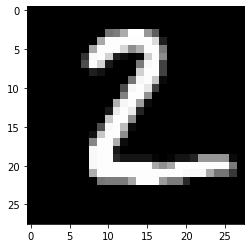

In [3]:
plt.imshow(test_x[1,0,:,:].numpy(), 'gray')

In [4]:
test_y[:10]

tensor([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

In [5]:
class FC(nn.Module):
    def __init__(self):
        super(FC, self).__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 10)
        self.fc3 = nn.Linear(10, 10)

    def forward(self, x):
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)

        output = x
        return output


fc = FC()

optimizer = torch.optim.Adam(fc.parameters(), lr=LR)
# loss_func = nn.MSELoss()
loss_func = nn.CrossEntropyLoss()

data_size = 20000
batch_size = 50

for epoch in range(EPOCH):
    random_indx = np.random.permutation(data_size)
    for batch_i in range(data_size // batch_size):
        indx = random_indx[batch_i * batch_size:(batch_i + 1) * batch_size]

        b_x = train_x[indx, :]
        b_y = train_y[indx]

        output = fc(b_x)
        loss = loss_func(output, b_y)

        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if batch_i % 50 == 0:
            test_output = fc(test_x)
            pred_y = torch.max(test_output, 1)[1].data.squeeze()
            # pred_y = torch.max(test_output, 1)[1].data.squeeze()
            accuracy = torch.sum(pred_y == test_y).type(torch.FloatTensor) / test_y.size(0)
            print('Epoch: ', epoch, '| train loss: %.4f' % loss.data.cpu().numpy(), '| test accuracy: %.3f' % accuracy)

test_output = fc(test_x[:10])
pred_y = torch.max(test_output, 1)[1].data.squeeze()  # move the computation in GPU

print(pred_y, 'prediction number')
print(test_y[:10], 'real number')

Epoch:  0 | train loss: 2.3283 | test accuracy: 0.168
Epoch:  0 | train loss: 1.0474 | test accuracy: 0.636
Epoch:  0 | train loss: 0.6071 | test accuracy: 0.778
Epoch:  0 | train loss: 0.4852 | test accuracy: 0.845
Epoch:  0 | train loss: 0.6127 | test accuracy: 0.866
Epoch:  0 | train loss: 0.1790 | test accuracy: 0.883
Epoch:  0 | train loss: 0.3028 | test accuracy: 0.879
Epoch:  0 | train loss: 0.3014 | test accuracy: 0.887
Epoch:  1 | train loss: 0.2896 | test accuracy: 0.900
Epoch:  1 | train loss: 0.2311 | test accuracy: 0.900
Epoch:  1 | train loss: 0.1760 | test accuracy: 0.907
Epoch:  1 | train loss: 0.1431 | test accuracy: 0.910
Epoch:  1 | train loss: 0.1226 | test accuracy: 0.906
Epoch:  1 | train loss: 0.2504 | test accuracy: 0.917
Epoch:  1 | train loss: 0.0745 | test accuracy: 0.911
Epoch:  1 | train loss: 0.4118 | test accuracy: 0.918
tensor([7, 2, 1, 0, 4, 1, 4, 9, 6, 9]) prediction number
tensor([7, 2, 1, 0, 4, 1, 4, 9, 5, 9]) real number


In [16]:
test_output = fc(test_x[:1])
pred_y = torch.max(test_output, 1)[1].data.squeeze()  # move the computation in GPU

print(pred_y, 'prediction number')
print(test_y[:1], 'real number')

tensor(7) prediction number
tensor([7]) real number


In [21]:
test_output

tensor([[-1.7228, -5.7907,  3.7918,  4.6222, -2.6630,  0.7286,  0.8211, 11.8054,
          0.9796,  3.1643]], grad_fn=<AddmmBackward>)

In [18]:
test_x[:1].shape

torch.Size([1, 1, 28, 28])

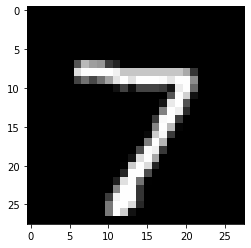

In [19]:
plt.imshow(test_x[:1].numpy().squeeze(), 'gray')

In [2]:
import torch
torch.eye(10)
0, 1, 2, ..., 9 

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])